Yann LeCun 被譽為 Deep Learning 的三巨頭之一。他的 CNN (Convolutional Neural Networks) 是讓 Neural Network 重新受到重視的主因之一。

## 8-1 初始準備

基本上和之前是一樣的, 我們就不再說明。

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
import numpy as np 
import matplotlib.pyplot as plt


## 8-2 讀入 MNIST 數據庫

### 由 Keras 讀入 MNIST

基本上和我們上次一樣, 這次因為 Keras 已偷偷把數據庫存在你的電腦, 所以會快很多!

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

### 輸入格式整理

如果你還記得, 我們每筆輸入資料都是 28x28 的陣列, CNN 其實就是吃「圖」的, 所以基本上不用像之前把每筆資料拉平。「但。是。」平常的圖都有 R, G, B 三個 channels, 每個 channel 都是一個矩陣, 也就是一張圖可能是三個矩陣! 我們是灰階, 也就是只有一個 channel。但這件事也要明確的告訴 Keras。

換句話說, 我們的輸入每筆資料型式要從 (28, 28) 換成 (28, 28, 1)!

In [5]:
x_train[1234].shape

(28, 28)

In [6]:
# CNN 要的 (28,28,1)

確認一下...

In [7]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

原來 28x28 矩陣...

In [8]:
x_train[1234].shape

(28, 28, 1)

In [9]:
X=x_train[1234]

In [10]:
X=X.reshape(28,28)

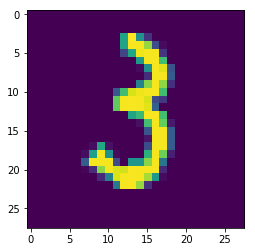

In [11]:
plt.imshow(X)
plt.show()

### 輸出格式整理

和上次一樣, 我們用標準 1-hot 方式處理。

In [12]:
y_train[1234]

3

In [13]:
from keras.utils import np_utils

In [14]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [15]:
y_train.shape

(60000, 10)

In [16]:
y_train[1234]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
x_train_norm=(x_train - x_train.min())/(x_train.max()-x_train.min())
x_test_norm=(x_test - x_test.min())/(x_test.max()-x_test.min())

## 8-3 打造你的 CNN

### 決定神經網路架構、讀入相關套件

CNN 我們一樣要決定用幾層的 CNN, 然後是不是每次都要做 max-pooling。再來就是拉平、送入標準神經網路 (再度要決定幾層、幾個神經元)。

* 做 <span style="color:red;">3</span> 次 convolution, 每次都接 max-pooling
* filter 大小都是 <span style="color:red;">3x3</span>, max-pooling 都用 <span style="color:red;">2x2</span> 為一小區塊

CNN 一個小技巧是每層的 filters 數目是越來越多。做完 convolution 之後, 我們要拉平、再送入一個標準的神經網路。這個神經網路設計是這樣:

* 只有 <span style="color:red;">1</span> 個隱藏層, 使用 <span style="color:red;">200</span> 個神經元。

In [18]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Flatten#(拉平)
from keras.layers import Conv2D ,MaxPool2D
from keras.optimizers import SGD,Adam


### 建構我們的神經網路

一開始一樣是打開個空白的神經網路。

In [19]:
model = Sequential ()

第一個隱藏層一樣要告訴 Keras 我們輸入長什麼樣子。`padding` 設成 `same` 是每個 filter 會輸出原來 28x28 一樣大小的矩陣。

In [20]:
model.add(Conv2D(8,(5,5),padding='same',input_shape=(28,28,1))) #第一層 4個 filter size 5*5 
model.add(Activation('elu'))

Instructions for updating:
Colocations handled automatically by placer.


Max-Pooling!

In [21]:
model.add(MaxPool2D(pool_size=(2,2)))

第二次 Convolution!

In [22]:
model.add(Conv2D(16,(5,5),padding='same')) #第二層 8個 filter size 5*5 
model.add(Activation('selu'))

再 Max-Pooling!

In [23]:
model.add(MaxPool2D(pool_size=(2,2)))

第三次 Convolution!

In [24]:
model.add(Conv2D(32,(5,5),padding='same')) #第二層 8個 filter size 5*5 
model.add(Activation('relu'))

Max-Pooling 最終回。

In [25]:
model.add(MaxPool2D(pool_size=(2,2)))

然後我們要送進一般的神經網路了。記得這是要拉平的, 還在 Keras 會幫我們做!

In [26]:
model.add(Flatten())
model.add(Dense(9))
model.add(Activation('relu'))

輸出和上次一樣!

In [27]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [28]:
model.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0xb279f8eb8>>

### 組裝

和之前比較不一樣的是我們還要做 `compile` 才正式把我們的神經網路建好。

In [29]:
#model.compile(loss="categorical_crossentropy",
#              optimizer=Adadelta(),
#              metrics=['accuracy'])

In [30]:
model.compile(loss='mean_squared_error',
                    optimizer=SGD(lr=0.01),
                      metrics =['accuracy'])

### 檢視我們的神經網路

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        3216      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          12832     
__________

## 8-4 訓練

In [32]:
model.fit(x_train,y_train,batch_size=75,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 33s 553us/step - loss: 0.0825 - acc: 0.2464
Epoch 2/10
60000/60000 [==============================] - 33s 551us/step - loss: 0.0733 - acc: 0.3072
Epoch 3/10
60000/60000 [==============================] - 33s 552us/step - loss: 0.0723 - acc: 0.3116
Epoch 4/10
60000/60000 [==============================] - 32s 540us/step - loss: 0.0718 - acc: 0.3154
Epoch 5/10
60000/60000 [==============================] - 33s 554us/step - loss: 0.0699 - acc: 0.3121
Epoch 6/10
60000/60000 [==============================] - 39s 650us/step - loss: 0.0637 - acc: 0.3251
Epoch 7/10
60000/60000 [==============================] - 37s 609us/step - loss: 0.0559 - acc: 0.4416
Epoch 8/10
60000/60000 [==============================] - 35s 582us/step - loss: 0.0504 - acc: 0.5658
Epoch 9/10
60000/60000 [==============================] - 36s 606us/step - loss: 0.0475 - acc: 0.5987
Epoch 10/10
60000/60000 [=========

In [34]:
y_train.shape

(60000, 10)

## 8-5 結果測試

### 分數

### 儲存結果

結果看來還不差, 所以我們把結果存起來。

### 欣賞一下成果

我們用另一個方式: 每次選 5 個顯示, 看是不是有正確辨識。

In [35]:
from keras.optimizers import SGD,Adam,Nadam

## 小結論

我們到此, 基本上是「亂做」的神經網路。有些同學在不斷試驗的過程中, 可能會發現有時會出現很糟糕的結果。因此, 接下來我們要介紹怎麼樣用些簡單的手法, 能讓學習效果比較穩定, 而且有可能可以增加學習效率。